In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# Get the data for this tickers from yahoo finance
data = yf.download(tickers.Symbol.to_list(),'2021-1-1','2021-7-12', auto_adjust=True)['Close']
sp500 = yf.download('^GSPC', start='2021-1-1', end='2021-7-12')
# data = pd.read_excel('S&P 500 stocks.xlsx')
# sp500 = pd.read_excel('Sp500 data.xlsx')

In [2]:
#making datagrame of the whole stock and sp500 index and then creating an amazon data frame for amazon close column
data = pd.DataFrame(data)
sp500 = pd.DataFrame(sp500)
amazon = pd.DataFrame(columns=['Date','AMZN'])
amazon = data[['AMZN']]
sp500Close = sp500[['Close']]
sp500Close

,Close
0,3700.649902
1,3726.860107
2,3748.139893
3,3803.790039
4,3824.679932
...,...
125,4352.339844
126,4343.540039
127,4358.129883
128,4320.819824


## Compare daily Returns

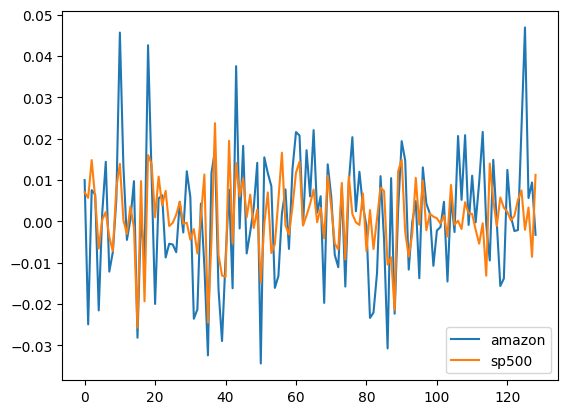

In [3]:
amazon_daily_returns = pd.Series(index=amazon.index)
sp500_daily_returns = pd.Series(index=sp500.index)

amazon_daily_returns = (amazon[1:].values/amazon[:-1].values) - 1
sp500_daily_returns = (sp500Close[1:].values/sp500Close[:-1].values) - 1

import matplotlib.pyplot as plt
plt.plot(amazon_daily_returns,label='amazon')
plt.plot(sp500_daily_returns,label='sp500')
plt.legend()
plt.show()
# plt.plot(sp500)

## Building the Regression Model and getting the expected returns

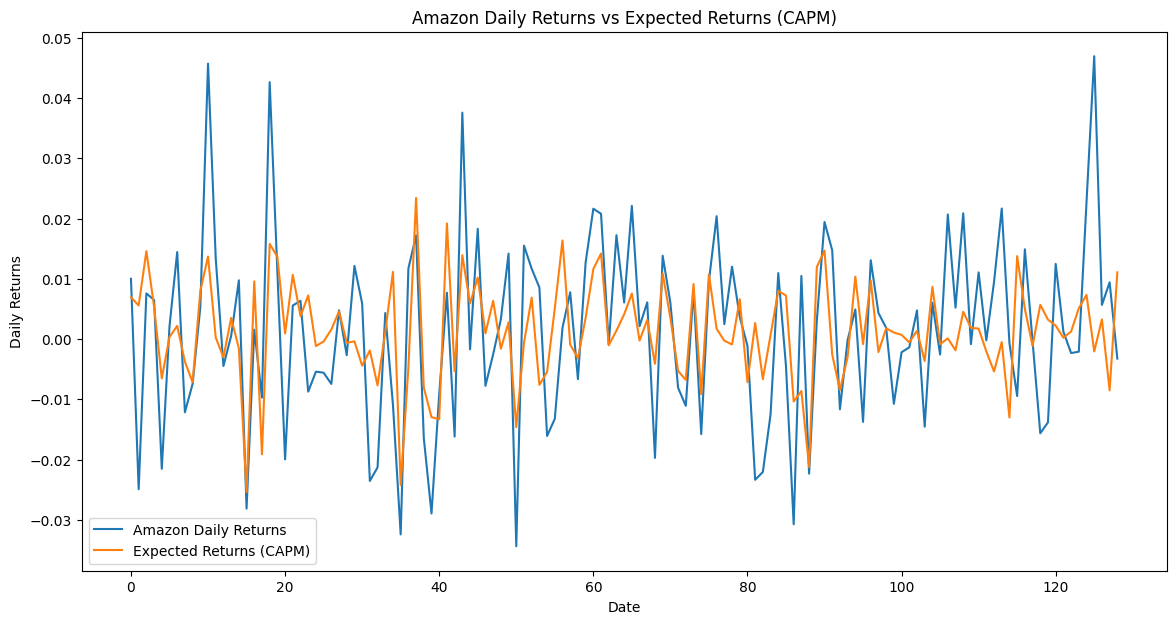

Beta of the stock is 0.9868707910927663


In [15]:
import statsmodels.api as sm
X = sm.add_constant(sp500_daily_returns)
amazonmodel = sm.OLS(amazon_daily_returns, X).fit()
beta = amazonmodel.params[1]
constant  = amazonmodel.params[0]

# Risk-free rate (use a proxy or historical data if needed)
risk_free_rate_annual = 0.015
risk_free_rate_daily = risk_free_rate_annual / 252

# CAPM formula
expected_return = beta * (sp500_daily_returns - risk_free_rate_daily) + constant


plt.figure(figsize=(14, 7))
plt.plot(amazon_daily_returns, label="Amazon Daily Returns")
plt.plot(expected_return, label="Expected Returns (CAPM)", linestyle='-')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Amazon Daily Returns vs Expected Returns (CAPM)')
plt.show()

print(f'Beta of the stock is {beta}')

In [13]:
print("Sp500 index daily return\n")
print(amazon_daily_returns)
print("\n\n")
print("Amazong expected daily return\n")
print(expected_return)

Sp500 index daily return

[[ 0.01000436]
 [-0.02489661]
 [ 0.00757713]
 [ 0.00649551]
 [-0.02151946]
 [ 0.0021258 ]
 [ 0.01443841]
 [-0.01213555]
 [-0.0074246 ]
 [ 0.00531852]
 [ 0.04570048]
 [ 0.01336342]
 [-0.00446331]
 [ 0.00053764]
 [ 0.00975414]
 [-0.02812581]
 [ 0.00155912]
 [-0.00970465]
 [ 0.0426299 ]
 [ 0.01110421]
 [-0.01996157]
 [ 0.00557585]
 [ 0.00634942]
 [-0.00871378]
 [-0.00539885]
 [-0.00557341]
 [-0.00743927]
 [ 0.00477597]
 [-0.00267262]
 [ 0.01214159]
 [ 0.00592081]
 [-0.02353506]
 [-0.02128061]
 [ 0.00432606]
 [-0.01094697]
 [-0.03240039]
 [ 0.01170039]
 [ 0.0172038 ]
 [-0.01640426]
 [-0.0289317 ]
 [-0.00912816]
 [ 0.00768748]
 [-0.01616746]
 [ 0.03756837]
 [-0.00170102]
 [ 0.01829843]
 [-0.00774027]
 [-0.00252794]
 [ 0.00330341]
 [ 0.01418885]
 [-0.03435878]
 [ 0.01551191]
 [ 0.01167821]
 [ 0.00856029]
 [-0.0160733 ]
 [-0.01321963]
 [ 0.00189411]
 [ 0.00776531]
 [-0.0066456 ]
 [ 0.01269601]
 [ 0.02162845]
 [ 0.02079405]
 [-0.00090189]
 [ 0.01723734]
 [ 0.00607124]

In [6]:
portfolio = ['AMZN','AAPL','GOOG','GRMN']
weightsOfStocks = [.25,.25,.25,.25]

dailyReturnsOfPortfolio = pd.DataFrame(columns=['Amazon','Apple','Google','Germin'])
for i in portfolio:
    stock = data[i]
    stockdailyreturn = (stock[1:].values/stock[:-1].values) - 1
    dailyReturnsOfPortfolio[i] = stockdailyreturn


